# KNN Classifier

In KNN Classification, there are only two steps. 

1. Find k nearest neighbors
2. Calculate y based on the k nearest neighbors

Hence the name KNN.

For step two, y is the most frequent value for classification, mean value for reguression.

The following example illustrates this algorithm:

![knn](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/330px-KnnClassification.svg.png)

the green round point is what we are going to predict. If k is 3 for KNN, the neighbors are two red triangles and one blue square. The most frequent neighbor is the red triangle. Thus, the green round point is predicted a red triangle.

# Load Data

In [101]:
import math
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

Automatically created module for IPython interactive environment


The following is the KNNClassifier class. We see it is very simple and straight-forward. We have only three methods. The first is fit. It just take X and y and remember it without doing any calculation. It is a **lazy** algorithm. It starts to calculate in the prediction phase. In the prediction phase, it firstly find the $neighbors$ of the point $p$, the the labels of the neighbors, at last the most frequent value is calculated based on the $neighbor\_labels$.

In [86]:
class KNNClassifier():
    X=None
    y=None
    n_neighbors=0
    
    def __init__(self, n_neighbors=15):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        self.X=np.array(X)
        self.y=np.array(y)
    
    def predict_one(self, p):
        distance_array=np.array(list(map(lambda o: math.dist(p, o), self.X)))
        argsorted=np.argsort(distance_array)
        neighbours = argsorted[:self.n_neighbors]
        neighbour_labels = y[neighbours]
        occurence_count = Counter(neighbour_labels)
        most_frequent = occurence_count.most_common(1)[0][0]
        return most_frequent
        
    def predict(self, X):
        y_hat = np.array(list(map(self.predict_one, X)))
        return y_hat

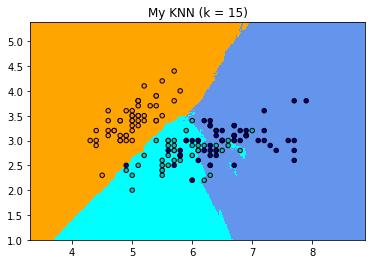

In [102]:
knn = KNNClassifier()
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("My KNN (k = %i)"
          % (n_neighbors))

plt.show()

# Compare with Scikit-learn

Here we compare our implementation with the one in Scikit-learn. We see that there are almost the same.

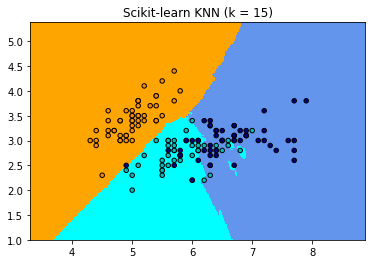

In [103]:
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Scikit-learn KNN (k = %i)"
          % (n_neighbors))

plt.show()

# Reference
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm